In [15]:
# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split

In [16]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [17]:
print(" Max value of X: ",X.max())
print(" Min value of X: ",X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",Y.max())
print(" Min value of Y: ",Y.min())
print(" Shape of Y: ",Y.shape)

Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


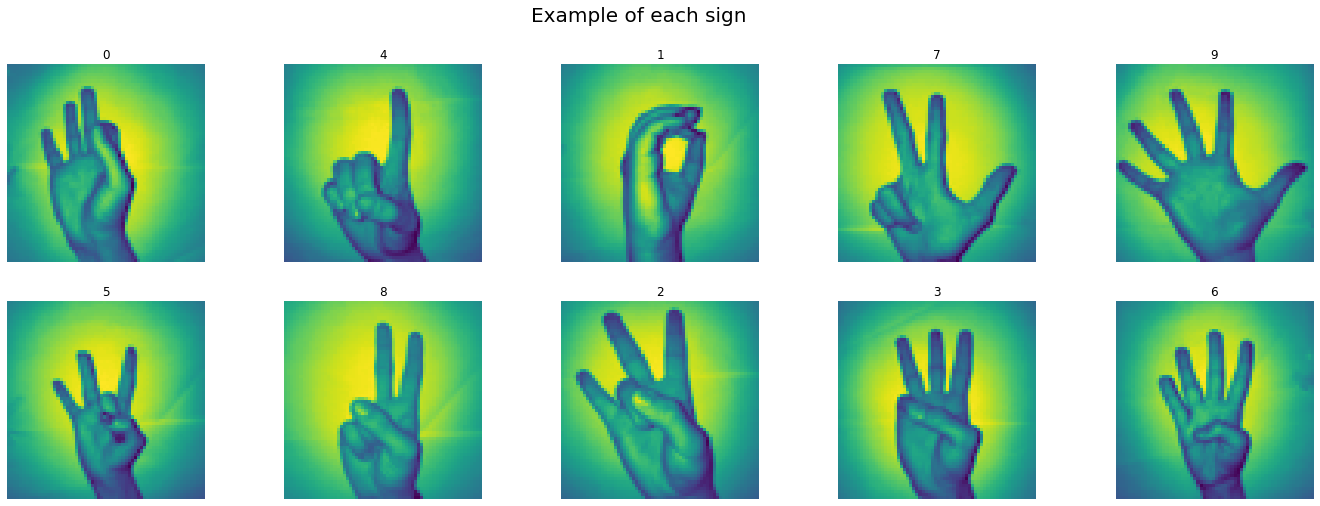

In [18]:
plt.figure(figsize=(24,8))
plt.subplot(2,5,1)
plt.title(Y[0].argmax())
plt.imshow(X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(Y[1000].argmax())
plt.imshow(X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(Y[222].argmax())
plt.imshow(X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(Y[1500].argmax())
plt.imshow(X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(Y[2000].argmax())
plt.imshow(X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(Y[1200].argmax())
plt.imshow(X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(Y[1700].argmax())
plt.imshow(X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(Y[500].argmax())
plt.imshow(X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(Y[700].argmax())
plt.imshow(X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(Y[1400].argmax())
plt.imshow(X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()


In [19]:
x_9 = X[:204]; x_0 = X[204:409]; x_7 = X[409:615]; x_6 = X[615:822]; x_1 = X[822:1028]; 
x_8 = X[1028:1236]; x_4 = X[1236:1443]; x_3 = X[1443:1649]; x_2 = X[1649:1855]; x_5 = X[1855:];

In [20]:
mean0 = x_0.mean(axis=0); mean1 = x_1.mean(axis=0); mean2 = x_2.mean(axis=0);
mean3 = x_3.mean(axis=0); mean4 = x_4.mean(axis=0); mean5 = x_5.mean(axis=0);
mean6 = x_6.mean(axis=0); mean7 = x_7.mean(axis=0); mean8 = x_8.mean(axis=0); mean9 = x_9.mean(axis=0);

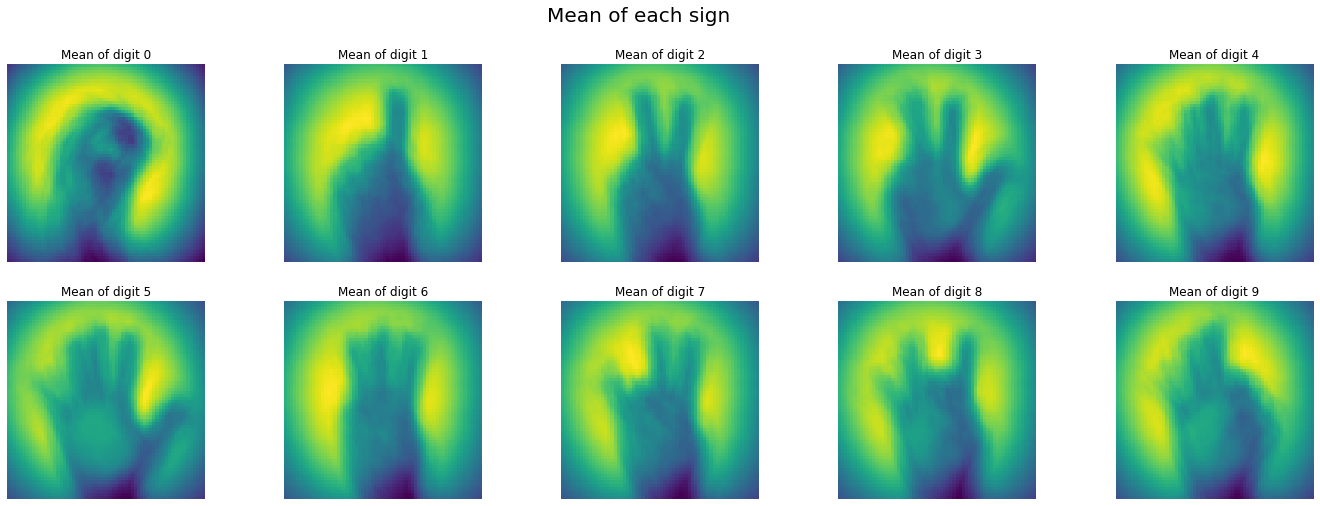

In [21]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title("Mean of digit 0")
plt.imshow(mean0)
plt.axis("off")

plt.subplot(2,5,2)
plt.title("Mean of digit 1")
plt.imshow(mean1)
plt.axis("off")

plt.subplot(2,5,3)
plt.title("Mean of digit 2")
plt.imshow(mean2)
plt.axis("off")

plt.subplot(2,5,4)
plt.title("Mean of digit 3")
plt.imshow(mean3)
plt.axis("off")

plt.subplot(2,5,5)
plt.title("Mean of digit 4")
plt.imshow(mean4)
plt.axis("off")

plt.subplot(2,5,6)
plt.title("Mean of digit 5")
plt.imshow(mean5)
plt.axis("off")

plt.subplot(2,5,7)
plt.title("Mean of digit 6")
plt.imshow(mean6)
plt.axis("off")

plt.subplot(2,5,8)
plt.title("Mean of digit 7")
plt.imshow(mean7)
plt.axis("off")

plt.subplot(2,5,9)
plt.title("Mean of digit 8")
plt.imshow(mean8)
plt.axis("off")

plt.subplot(2,5,10)
plt.title("Mean of digit 9")
plt.imshow(mean9)
plt.axis("off")

plt.suptitle("Mean of each sign", fontsize=20)
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [23]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

In [24]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

In [25]:
CNN_model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [26]:
results = CNN_model.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Epoch 1/70
52/52 [==============================] - 21s 412ms/step - loss: 2.3029 - accuracy: 0.1043 - val_loss: 2.3034 - val_accuracy: 0.0775
Epoch 2/70
52/52 [==============================] - 21s 400ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3052 - val_accuracy: 0.0775
Epoch 3/70
52/52 [==============================] - 21s 402ms/step - loss: 2.3025 - accuracy: 0.0995 - val_loss: 2.3046 - val_accuracy: 0.0847
Epoch 4/70
52/52 [==============================] - 20s 378ms/step - loss: 2.3021 - accuracy: 0.1049 - val_loss: 2.3045 - val_accuracy: 0.0775
Epoch 5/70
52/52 [==============================] - 20s 377ms/step - loss: 2.2983 - accuracy: 0.1092 - val_loss: 2.2983 - val_accuracy: 0.2058
Epoch 6/70
52/52 [==============================] - 20s 378ms/step - loss: 2.1604 - accuracy: 0.2177 - val_loss: 1.6407 - val_accuracy: 0.4576
Epoch 7/70
52/52 [==============================] - 20s 378ms/step - loss: 1.5830 - accuracy: 0.4397 - val_loss: 1.1369 - val_accuracy: 0.6005

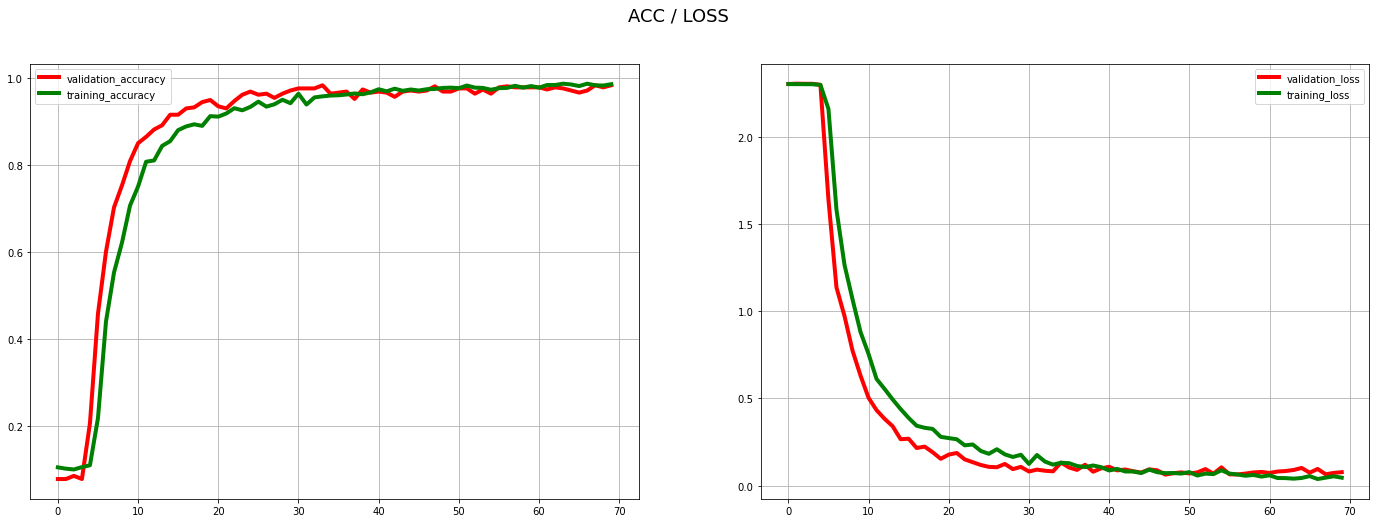

In [29]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()